## Part 1 Synchronic word embedding

In [2]:
# https://code.google.com/archive/p/word2vec/
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)


In [3]:
human_pairs = [
["cord","smile"],
["rooster","voyage"],
['noon','string'],
['fruit','furnace'],
['autograph','shore'],
['automobile','wizard'],
['mound','stove'],
['grin','implement'],
['asylum','fruit'],
['asylum','monk'],
['graveyard','madhouse'],
['glass','magician'],
['boy','rooster'],
['cushion','jewel'],
['monk','slave'],
['asylum','cemetery'],
['coast','forest'],
['grin','lad'],
['shore','woodland'],
['monk','oracle'],
['boy','sage'],
['automobile','cushion'],
['mound','shore'],
['lad','wizard'],
['forest','graveyard'],
['food','rooster'],
['cemetery','woodland'],
['shore','voyage'],
['bird','woodland'],
['coast','hill'],
['furnace','implement'],
['crane','rooster'],
['hill','woodland'],
['car','journey'],
['cemetery','mound'],
['glass','jewel'],
['magician','oracle'],
['crane','implement'],
['brother','lad'],
['sage','wizard'],
['oracle','sage'],
['bird','crane'],
['bird','cock'],
['food','fruit'],
['brother','monk'],
['asylum','madhouse'],
['furnace','stove'],
['magician','wizard'],
['hill','mount'],
['cord','string'],
['glass','tumbler'],
['grin','smile'],
['serf','slave'],
['journey','voyage'],
['autograph','signature'],
['coast','shore'],
['forest','woodland'],
['implement','tool'],
['cock','rooster'],
['boy','lad'],
['cushion','pillow'],
['cemetery','graveyard'],
['automobile','car'],
['midday','noon'],
['gem','jewel']]

S = [
0.02,
0.04,
0.04,
0.05,
0.06,
0.11,
0.14,
0.18,
0.19,
0.39,
0.42,
.44,
.44,
.45,
.57,
.79,
.85,
.88,
.90,
.91,
.96,
.97,
.97,
.99,
1,
1.09,
1.18,
1.22,
1.24,
1.26,
1.37,
1.41,
1.48,
1.55,
1.69,
1.78,
1.82,
2.37,
2.44,
2.46,
2.61,
2.63,
2.63,
2.69,
2.74,
3.04,
3.11,
3.21,
3.29,
3.41,
3.45,
3.46,
3.46,
3.58,
3.59,
3.60,
3.65,
3.66,
3.68,
3.82,
3.84,
3.88,
3.92,
3.94,
3.94]


Step 3. Calculate cosine distance between each pair of word embeddings you have extracted,
and report the Pearson correlation between word2vec-based and human similarities.

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
import scipy

google_pairs_cos_sim = []

for a, b in human_pairs:
    # cos_sim = cosine_similarity(model[a].reshape(1,-1) , model[b].reshape(1,-1))[0][0]
    cos_sim = cosine_similarity(model[a].reshape(1,-1) , model[b].reshape(1,-1))[0][0]
    # print(cos_sim)
    
    google_pairs_cos_sim.append(cos_sim)
# google_pairs_cos_sim
print("Pearson Correlation:",scipy.stats.pearsonr(google_pairs_cos_sim, S))


Pearson Correlation: (0.7391038598277422, 2.06746449676961e-12)


Step 4. Perform the analogy test based on data here (or as provided) with the pre-trained
word2vec embeddings. Report the accuracy on the semantic analogy test and the syntactic
analogy test (see Note below).


In [5]:
import pandas as pd
import numpy as np

# words from Brown corpus
analog_orig_df = pd.read_csv('word-test.v1.txt', sep=" ", header=None)
analog_orig_df = analog_orig_df.iloc[1:,:4]
analog_orig_df.columns = ['col_0','col_1','col_2','col_3']
analog_orig_df[analog_orig_df.col_0 == ":"]

,col_0,col_1,col_2,col_3
1,:,capital-common-countries,NaN,NaN
508,:,capital-world,NaN,NaN
5033,:,currency,NaN,NaN
5900,:,city-in-state,NaN,NaN
8368,:,family,NaN,NaN
8875,:,gram1-adjective-to-adverb,NaN,NaN
9868,:,gram2-opposite,NaN,NaN
10681,:,gram3-comparative,NaN,NaN
12014,:,gram4-superlative,NaN,NaN
13137,:,gram5-present-participle,NaN,NaN


In [6]:
analog_sem = analog_orig_df[:8874].copy()
analog_syn = analog_orig_df[8874:].copy()

analog_sem = analog_sem[analog_sem.col_0 != ":"].replace(r'\r+|\n+|\t+','', regex=True)
analog_syn = analog_syn[analog_syn.col_0 != ":"].replace(r'\r+|\n+|\t+','', regex=True)

In [7]:
analog_sem['col_0_1_cos_sim_w2v'] = analog_sem.apply(lambda r : cosine_similarity(model[r['col_0']].reshape(1,-1), model[r['col_1']].reshape(1,-1))[0][0], axis = 1)
analog_sem['col_2_3_cos_sim_w2v'] = analog_sem.apply(lambda r : cosine_similarity(model[r['col_2']].reshape(1,-1), model[r['col_3']].reshape(1,-1))[0][0], axis = 1)

analog_syn['col_0_1_cos_sim_w2v'] = analog_syn.apply(lambda r : cosine_similarity(model[r['col_0']].reshape(1,-1), model[r['col_1']].reshape(1,-1))[0][0], axis = 1)
analog_syn['col_2_3_cos_sim_w2v'] = analog_syn.apply(lambda r : cosine_similarity(model[r['col_2']].reshape(1,-1), model[r['col_3']].reshape(1,-1))[0][0], axis = 1)


In [8]:
# analog pairs semantics dataframe
analog_sem

,col_0,col_1,col_2,col_3,col_0_1_cos_sim_w2v,col_2_3_cos_sim_w2v
2,Athens,Greece,Baghdad,Iraq,0.588816,0.679758
3,Athens,Greece,Bangkok,Thailand,0.588816,0.701499
4,Athens,Greece,Beijing,China,0.588816,0.764846
5,Athens,Greece,Berlin,Germany,0.588816,0.631355
6,Athens,Greece,Bern,Switzerland,0.588816,0.410072
...,...,...,...,...,...,...
8870,uncle,aunt,son,daughter,0.764347,0.846830
8871,uncle,aunt,sons,daughters,0.764347,0.839468
8872,uncle,aunt,stepbrother,stepsister,0.764347,0.533349
8873,uncle,aunt,stepfather,stepmother,0.764347,0.737912


In [9]:
# analog pairs syntatic dataframe
analog_syn

,col_0,col_1,col_2,col_3,col_0_1_cos_sim_w2v,col_2_3_cos_sim_w2v
8876,amazing,amazingly,apparent,apparently,0.515487,0.437020
8877,amazing,amazingly,calm,calmly,0.515487,0.457924
8878,amazing,amazingly,cheerful,cheerfully,0.515487,0.456405
8879,amazing,amazingly,complete,completely,0.515487,0.245060
8880,amazing,amazingly,efficient,efficiently,0.515487,0.599991
...,...,...,...,...,...,...
19554,write,writes,talk,talks,0.441932,0.462063
19555,write,writes,think,thinks,0.441932,0.588549
19556,write,writes,vanish,vanishes,0.441932,0.566819
19557,write,writes,walk,walks,0.441932,0.700726


In [10]:
# repeating steps from exercise one, pulling data from brown corpus
import nltk
nltk.download('brown')
from nltk.corpus import brown
brown_df = pd.DataFrame(brown.words())
brown_df.columns = ['token']
brown_df.token = brown_df.token.str.lower()
brown_df = brown_df[~brown_df.token.str.match("\W")]

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\andyl\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [11]:
# Building W
W = pd.DataFrame(brown_df.value_counts().reset_index().token).head(5000).reset_index(drop=True)

rg65 = "cord smile rooster voyage noon string fruit furnace autograph shore automobile wizard mound stove grin implement asylum fruit monk graveyard madhouse glass magician boy rooster cushion jewel monk slave cemetery coast forest grin lad shore woodland monk oracle boy sage automobile cushion shore mount lad wizard forest graveyard food rooster cemetery woodlane shore voyage birdcoast hill furnace implement crane rooster hill car journey cemetery mound glass jewel magician oracle crane implement brother lad sage wizard oracle sage bird crane cock food fruit brother monk madhouse furnace stove magician wizard hill cord string glass tumbler grin smile serf slave journey voyage autograph signature coast shore forest woodlane tool cock rooster boy lad cushion pillow graveyard automobile car midday noon gem jewel"
df_rg65 = pd.DataFrame(str.split(rg65," "), dtype="string").drop_duplicates()
df_rg65.columns = ['token']
df_rg65 = df_rg65[~df_rg65['token'].isin(W.token)]

W = pd.concat([W, df_rg65]).reset_index(drop=True)

In [12]:
# building M1
# bi_gram['context'] = np.append(bi_gram.token[1:].values, np.nan)
bi_gram = brown_df.copy()
bi_gram['context'] = bi_gram.token
bi_gram['context'][0:-1] = bi_gram['context'][1:]
bi_gram = bi_gram.iloc[:-1].reset_index(drop=True)

# create |W| x |W| matrix
M1 = pd.DataFrame(0, index=W.token,columns=W.token, dtype="int")
M1


token,the,of,and,to,a,in,that,is,was,he,...,woodlane,birdcoast,crane,cock,tumbler,serf,signature,pillow,midday,gem
token,,,,,,,,,,,,,,,,,,,,,
the,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
of,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
and,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
to,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
serf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
signature,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pillow,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
lookup_list = list(W.token)

for index, (a, b) in bi_gram.iterrows():
    if a not in lookup_list or b not in lookup_list:
        continue
    else:
        # print(a, b)
        # val = M1.loc[a][b]
        # val += 1
        M1.loc[a][b] += 1

In [14]:
# Step 4. Compute positive pointwise mutual information on M1. Denote this model as M1+.
M1_total = M1.sum().sum()
M1_col_sum = M1.sum(axis=0)
M1_row_sum = M1.sum(axis=1)

M1_denominator_a= pd.DataFrame().reindex_like(M1)
M1_denominator_b= pd.DataFrame().reindex_like(M1)

M1_denominator_a[:] = M1_row_sum
M1_denominator_b[:] = M1_col_sum

M1_denominator_a = M1_denominator_a.transpose()
M1_denominator = (M1_denominator_a/M1_total) * (M1_denominator_b/M1_total)
M1_plus = ((M1/M1_total) / M1_denominator).fillna(0)
M1_plus = np.log2(M1_plus).clip(0,)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=300)
M2_300 = pca.fit_transform(M1_plus)

In [16]:
# find words that are in LSA
# Preparation work
W_list = W.token.values.tolist()
analog_LSA_sem = analog_orig_df[:8874].copy()
analog_LSA_syn = analog_orig_df[8874:].copy()

analog_LSA_sem = analog_LSA_sem[analog_LSA_sem.col_0 != ":"].replace(r'\r+|\n+|\t+','', regex=True)
analog_LSA_syn = analog_LSA_syn[analog_LSA_syn.col_0 != ":"].replace(r'\r+|\n+|\t+','', regex=True)


analog_LSA_sem_exclusive = analog_LSA_sem[(analog_LSA_sem.col_0.isin(W.token) & 
    analog_LSA_sem.col_1.isin(W.token) & 
    analog_LSA_sem.col_2.isin(W.token) & 
    analog_LSA_sem.col_3.isin(W.token))]

analog_LSA_syn_exclusive = analog_LSA_syn[(analog_LSA_syn.col_0.isin(W.token) & 
    analog_LSA_syn.col_1.isin(W.token) & 
    analog_LSA_syn.col_2.isin(W.token) & 
    analog_LSA_syn.col_3.isin(W.token))]

# ############################
# ############################

token2index = pd.Series(data = W.index, index = W.token.values)

temp = pd.DataFrame(
    [analog_LSA_sem_exclusive.col_0.map(token2index), 
    analog_LSA_sem_exclusive.col_1.map(token2index),
    analog_LSA_sem_exclusive.col_2.map(token2index),
    analog_LSA_sem_exclusive.col_3.map(token2index),],    
    index=("col_0_idx", "col_1_idx", "col_2_idx", "col_3_idx")
    ).transpose()

analog_LSA_sem_exclusive = pd.concat([analog_LSA_sem_exclusive, temp], axis=1)

analog_LSA_sem_exclusive['col_0_1_cos_sim_lsa'] = analog_LSA_sem_exclusive.apply(lambda r : cosine_similarity(M2_300[r['col_0_idx']].reshape(1,-1), M2_300[r['col_1_idx']].reshape(1,-1))[0][0], axis = 1)
analog_LSA_sem_exclusive['col_2_3_cos_sim_lsa'] = analog_LSA_sem_exclusive.apply(lambda r : cosine_similarity(M2_300[r['col_2_idx']].reshape(1,-1), M2_300[r['col_3_idx']].reshape(1,-1))[0][0], axis = 1)

# ############################

temp = pd.DataFrame(
    [analog_LSA_syn_exclusive.col_0.map(token2index), 
    analog_LSA_syn_exclusive.col_1.map(token2index),
    analog_LSA_syn_exclusive.col_2.map(token2index),
    analog_LSA_syn_exclusive.col_3.map(token2index),],    
    index=("col_0_idx", "col_1_idx", "col_2_idx", "col_3_idx")
    ).transpose()

analog_LSA_syn_exclusive = pd.concat([analog_LSA_syn_exclusive, temp], axis=1)

analog_LSA_syn_exclusive['col_0_1_cos_sim_lsa'] = analog_LSA_syn_exclusive.apply(lambda r : cosine_similarity(M2_300[r['col_0_idx']].reshape(1,-1), M2_300[r['col_1_idx']].reshape(1,-1))[0][0], axis = 1)
analog_LSA_syn_exclusive['col_2_3_cos_sim_lsa'] = analog_LSA_syn_exclusive.apply(lambda r : cosine_similarity(M2_300[r['col_2_idx']].reshape(1,-1), M2_300[r['col_3_idx']].reshape(1,-1))[0][0], axis = 1)



In [17]:
# analog pair test on semantic words that exists in LSA
analog_LSA_sem_exclusive

,col_0,col_1,col_2,col_3,col_0_idx,col_1_idx,col_2_idx,col_3_idx,col_0_1_cos_sim_lsa,col_2_3_cos_sim_lsa
8369,boy,girl,brother,sister,386,423,1475,2903,0.418332,0.054420
8372,boy,girl,father,mother,386,423,526,431,0.418332,0.225826
8377,boy,girl,he,she,386,423,9,36,0.418332,0.955694
8378,boy,girl,his,her,386,423,14,34,0.418332,0.521113
8379,boy,girl,husband,wife,386,423,778,408,0.418332,0.268544
...,...,...,...,...,...,...,...,...,...,...
8863,uncle,aunt,his,her,1959,4456,14,34,0.037951,0.521113
8864,uncle,aunt,husband,wife,1959,4456,778,408,0.037951,0.268544
8865,uncle,aunt,king,queen,1959,4456,1202,2712,0.037951,0.091790
8866,uncle,aunt,man,woman,1959,4456,80,415,0.037951,0.429149


In [18]:
# analog pair test on syntactic words that exists in LSA
analog_LSA_syn_exclusive

,col_0,col_1,col_2,col_3,col_0_idx,col_1_idx,col_2_idx,col_3_idx,col_0_1_cos_sim_lsa,col_2_3_cos_sim_lsa
8909,apparent,apparently,complete,completely,1960,827,528,953,-0.029002,-0.010586
8911,apparent,apparently,fortunate,fortunately,1960,827,4499,4914,-0.029002,0.193797
8912,apparent,apparently,free,freely,1960,827,359,4479,-0.029002,0.036568
8914,apparent,apparently,happy,happily,1960,827,1091,4878,-0.029002,-0.059839
8915,apparent,apparently,immediate,immediately,1960,827,1340,841,-0.029002,0.002050
...,...,...,...,...,...,...,...,...,...,...
19543,write,writes,provide,provides,999,2700,429,1343,0.253212,0.412121
19544,write,writes,say,says,999,2700,170,469,0.253212,0.340995
19547,write,writes,see,sees,999,2700,117,3066,0.253212,0.228017
19555,write,writes,think,thinks,999,2700,197,4374,0.253212,0.251535


In [19]:
# combine all results from semantic comparison into one dataframe to analyze
pd.set_option('display.max_rows', 20)
print("Semantic Comparison")
sem_comparison = pd.merge(analog_sem, analog_LSA_sem_exclusive, left_index=True, right_index=True).iloc[:,np.r_[0:6, 14:16]]
sem_comparison

Semantic Comparison


,col_0_x,col_1_x,col_2_x,col_3_x,col_0_1_cos_sim_w2v,col_2_3_cos_sim_w2v,col_0_1_cos_sim_lsa,col_2_3_cos_sim_lsa
8369,boy,girl,brother,sister,0.854327,0.716038,0.418332,0.054420
8372,boy,girl,father,mother,0.854327,0.790148,0.418332,0.225826
8377,boy,girl,he,she,0.854327,0.612995,0.418332,0.955694
8378,boy,girl,his,her,0.854327,0.635906,0.418332,0.521113
8379,boy,girl,husband,wife,0.854327,0.829417,0.418332,0.268544
...,...,...,...,...,...,...,...,...
8863,uncle,aunt,his,her,0.764347,0.635906,0.037951,0.521113
8864,uncle,aunt,husband,wife,0.764347,0.829417,0.037951,0.268544
8865,uncle,aunt,king,queen,0.764347,0.651096,0.037951,0.091790
8866,uncle,aunt,man,woman,0.764347,0.766401,0.037951,0.429149


In [20]:
# combine all results from syntatic comparison into one dataframe to analyze
print("Syntactic Comparison")
syn_comparison = pd.merge(analog_syn, analog_LSA_syn_exclusive, left_index=True, right_index=True).iloc[:,np.r_[0:6, 14:16]]
syn_comparison

Syntactic Comparison


,col_0_x,col_1_x,col_2_x,col_3_x,col_0_1_cos_sim_w2v,col_2_3_cos_sim_w2v,col_0_1_cos_sim_lsa,col_2_3_cos_sim_lsa
8909,apparent,apparently,complete,completely,0.437020,0.245060,-0.029002,-0.010586
8911,apparent,apparently,fortunate,fortunately,0.437020,0.497340,-0.029002,0.193797
8912,apparent,apparently,free,freely,0.437020,0.343171,-0.029002,0.036568
8914,apparent,apparently,happy,happily,0.437020,0.424110,-0.029002,-0.059839
8915,apparent,apparently,immediate,immediately,0.437020,0.495548,-0.029002,0.002050
...,...,...,...,...,...,...,...,...
19543,write,writes,provide,provides,0.441932,0.689535,0.253212,0.412121
19544,write,writes,say,says,0.441932,0.384694,0.253212,0.340995
19547,write,writes,see,sees,0.441932,0.459383,0.253212,0.228017
19555,write,writes,think,thinks,0.441932,0.588549,0.253212,0.251535


In [21]:
# quick helper function to find how close are two words
def how_close(w1, w2):
    print(w1,w2,cosine_similarity(model[w1].reshape(1,-1), model[w2].reshape(1,-1)))

Repeat the analysis with LSA vectors (300 dimensions) from the earlier exercise, and commment on the results in comparison to those from
word2vec. [1 point] Note: It is expected that the number of entries you could test with LSA would be smaller than that based on word2vec. For a fair comparison, you should consider reporting model accuracies based on the small test set, for both word2vec and LSA.

In [22]:
import scipy

# semantic comparison between LSA and W2V pairs
print(scipy.stats.pearsonr(sem_comparison.col_0_1_cos_sim_w2v, sem_comparison.col_0_1_cos_sim_lsa))
print(scipy.stats.pearsonr(sem_comparison.col_2_3_cos_sim_w2v, sem_comparison.col_2_3_cos_sim_lsa))
sem_comparison


(-0.4462287984096593, 1.0428666034408915e-05)
(-0.44622879840965946, 1.0428666034408819e-05)


,col_0_x,col_1_x,col_2_x,col_3_x,col_0_1_cos_sim_w2v,col_2_3_cos_sim_w2v,col_0_1_cos_sim_lsa,col_2_3_cos_sim_lsa
8369,boy,girl,brother,sister,0.854327,0.716038,0.418332,0.054420
8372,boy,girl,father,mother,0.854327,0.790148,0.418332,0.225826
8377,boy,girl,he,she,0.854327,0.612995,0.418332,0.955694
8378,boy,girl,his,her,0.854327,0.635906,0.418332,0.521113
8379,boy,girl,husband,wife,0.854327,0.829417,0.418332,0.268544
...,...,...,...,...,...,...,...,...
8863,uncle,aunt,his,her,0.764347,0.635906,0.037951,0.521113
8864,uncle,aunt,husband,wife,0.764347,0.829417,0.037951,0.268544
8865,uncle,aunt,king,queen,0.764347,0.651096,0.037951,0.091790
8866,uncle,aunt,man,woman,0.764347,0.766401,0.037951,0.429149


In [23]:
# syntactic comparison between LSA and W2V pairs
print(scipy.stats.pearsonr(syn_comparison.col_0_1_cos_sim_w2v, syn_comparison.col_0_1_cos_sim_lsa))
print(scipy.stats.pearsonr(syn_comparison.col_2_3_cos_sim_w2v, syn_comparison.col_2_3_cos_sim_lsa))
syn_comparison


(0.12683367607474327, 1.3452265824511928e-08)
(0.12683367607474408, 1.3452265824510256e-08)


,col_0_x,col_1_x,col_2_x,col_3_x,col_0_1_cos_sim_w2v,col_2_3_cos_sim_w2v,col_0_1_cos_sim_lsa,col_2_3_cos_sim_lsa
8909,apparent,apparently,complete,completely,0.437020,0.245060,-0.029002,-0.010586
8911,apparent,apparently,fortunate,fortunately,0.437020,0.497340,-0.029002,0.193797
8912,apparent,apparently,free,freely,0.437020,0.343171,-0.029002,0.036568
8914,apparent,apparently,happy,happily,0.437020,0.424110,-0.029002,-0.059839
8915,apparent,apparently,immediate,immediately,0.437020,0.495548,-0.029002,0.002050
...,...,...,...,...,...,...,...,...
19543,write,writes,provide,provides,0.441932,0.689535,0.253212,0.412121
19544,write,writes,say,says,0.441932,0.384694,0.253212,0.340995
19547,write,writes,see,sees,0.441932,0.459383,0.253212,0.228017
19555,write,writes,think,thinks,0.441932,0.588549,0.253212,0.251535


Step 5. Suggest a way to improve the existing set of vector-based models in capturing word
similarities in general, and provide justifications for your suggestion. [2 points]

In [24]:
# shows toronto and Toronto aren't that close
how_close("Toronto","toronto")

Toronto toronto [[0.4316579]]


In [25]:
# shows Toronto and Paris has different "closeness" depending on case.
print(how_close("Toronto","Paris"))
print(how_close("Toronto","paris"))

Toronto Paris [[0.3180833]]
None
Toronto paris [[0.09818467]]
None


In [26]:
# two fox are barely the same thing.
print(how_close("fox","Fox"))

fox Fox [[0.18513957]]
None


## Part 2 Diachronic word embedding

Propose three different methods for measuring degree of semantic change for individual words and report the top 20 most and least changing words in table(s) from each measure. Measure the intercorrelations (of semantic change in all words, given the embeddings from Step 1) among the three methods you have proposed and summarize the Pearson correlations in a 3-by-3 table. [3 points]

- Method 1 - cosine similarity on words between decades
- Method 2 - Dimension Reduction + kNN on words between decades
- Method 3 - Full dimentionality + kNN on words between decades

In [27]:
import pickle

# diachornic file from assignment
with open('embeddings/data.pkl', 'rb') as f:
    data = pickle.load(f)


In [28]:
# 'w': a list of 2000 words, a subset of the English lexicon
# 'd': a list of decades between 1900 and 2000
# 'E': a 2000 by 10 by 300 list of list of vectors; the (i,j)-th entry is a 300-dimensional vector for the i-th word in the j-th decade
w_2000 = pd.Series(data['w'])
d_2000 = pd.Series(data['d'])

# 2000 rows -- words
# 10 columns -- decades
# each value -- list of 300 
E_2000 = pd.DataFrame(data['E'])


In [29]:
# data['E'][1888][9]
# E 1888th word, 9th decade

def cos_sim_by_decade(w, w_list, e):
    temp = []    
    i = w_list[w_list== w].index[0]
    for a, b in zip(e.iloc[i][:-1], e.iloc[i][1:]):
        temp.append(cosine_similarity(a.reshape(1,-1), b.reshape(1,-1))[0][0])
    
    return temp

temp = []
for a in w_2000:    
    temp.append(cos_sim_by_decade(a,w_2000, E_2000))

# Method 1

work_df = pd.DataFrame(temp, index=w_2000)
work_df["word_mean"] = work_df.mean(axis=1)
work_df['word_sd'] = work_df.std(axis=1)
    

In [30]:
# Cos-sim SD

work_df2 = work_df.iloc[:,:9].subtract(work_df.iloc[:,:9].mean(axis=1), axis=0).div(work_df.iloc[:,:9].std(axis=1), axis=0)
work_df2.columns = d_2000[:-1].astype(str).reset_index(drop=1) + "-" + d_2000[1:].astype(str).reset_index(drop=1)

In [31]:
from scipy.spatial import distance

pca = PCA(n_components=10)

method2_temp1 = []

for i in range(10):
    p = pca.fit_transform(E_2000[i].tolist())
    method2_temp1.append(p.tolist())

method2_df = pd.DataFrame(method2_temp1, columns=w_2000, index=d_2000).transpose()

In [32]:
from sklearn.neighbors import NearestNeighbors

# build kNN model for 2D word2vec

dict_2 = {}
for i, year in zip(range(len(E_2000)), E_2000):
    X_2 = np.array(method2_df.iloc[:,i].to_list())
    nbrs_2 = NearestNeighbors(n_neighbors=9, algorithm='ball_tree').fit(X_2)

    dict_2[year] = pd.DataFrame(nbrs_2.kneighbors_graph(X_2).toarray(), index=(w_2000 + ""), columns=(w_2000 + ""))


In [33]:
# build kNN model for 300D word2vec

dict_300 = {}
for i, year in zip(range(len(E_2000)), E_2000):
    X = np.array(E_2000[i].to_list())
    nbrs = NearestNeighbors(n_neighbors=9, algorithm='ball_tree').fit(X)    

    dict_300[year] = pd.DataFrame(nbrs.kneighbors_graph(X).toarray(), index=(w_2000 + ""), columns=(w_2000 + ""))

In [34]:
# helper function used to keep track of the changes of words through the decade using kNN methods
def word_changes(word, dic, mode=0, verbose=False):


    last_list = []
    tally = {"same":0, "lost":0, "gain":0}
    tally2_list = []
    hist_list = []

    # "a" iterates through 10 decades
    for a in range(10):
        tally2 = {"same":0, "changes":0}
        if verbose: print("-"*70)
        # new_list = dic[a].loc[:,word][(dic[a].loc[:,word] != 0)].index.tolist() # old
        # new_list = dic[a][dic[a].loc[word] != 0].index.tolist()
        # print(dic[a])        
        # print(      dict_300[0][dict_300[0].loc[:,'degree'] != 0].index.tolist())
        temp = dic[a][dic[a].loc[:,word] != 0].index.tolist()
        temp.extend(dic[a][dic[a].loc[word] != 0].index.tolist())
        temp = list(set(temp))
        # print(temp.tolist())
        new_list =  temp
        # new_list =  dic     [a][dic     [a].loc[:,word] != 0].index.tolist()
        # print(new_list)
        # if verbose: print("last_list", last_list)
        if verbose: print(1900+a*10,"\t", new_list)
        if not last_list:
            # print("first time")
            last_list = new_list
            hist_list = new_list.copy()
            continue
        else:
            hist_list.extend(new_list)
            for w in new_list:                
                if w == word: continue
                if w in last_list:
                    # print("same word: ", w)
                    # print("saw in last list:", last_list)
                    tally["same"] += 1
                    tally2["same"] += 1
                else:
                    # print("new word: ", w)
                    # print("not saw in last list:", last_list)
                    tally["gain"] += 1
                    tally2["changes"] += 1
            for w in last_list:
                if w == word: continue
                if w not in new_list:
                    # print("loss/changes")
                    tally['lost'] += 1
                    tally2["changes"] += 1

            last_list = new_list
            tally2_list.append([tally2["same"], tally2["changes"]])
        if verbose and mode == 2: print(tally)        
        if verbose and (mode == 1 or mode == 0): print(tally2)
        if verbose and mode == 3: print(hist_list)
        

        
    if mode == 0:
        return tally2_list
    elif mode == 1:
        return [b for (a, b) in tally2_list]
    elif mode == 2:
        return tally
    elif mode == 3:
        return hist_list

# word_changes("instrument",dict_300, 1, 1)



In [35]:
pd.set_option('display.max_rows', 100)

word_changes_tally_dict_300 = []
word_changes_tally_dict_2 = []
for w in w_2000:
    word_changes_tally_dict_300.append(word_changes(w,dict_300, 1, 0))
    word_changes_tally_dict_2.append(word_changes(w,dict_2, 1, 0))

word_changes_tally_dict_300 = pd.DataFrame(word_changes_tally_dict_300, index=w_2000)
word_changes_tally_dict_2 = pd.DataFrame(word_changes_tally_dict_2, index=w_2000)

In [36]:
# measure the most change using SD
# calculating SD for method 2 and 3
word_changes_tally_dict_300_sd = word_changes_tally_dict_300.iloc[:,:]  \
    .sub(word_changes_tally_dict_300.mean(axis=1), axis=0)              \
    .div(word_changes_tally_dict_300.std(axis=1), axis=0)
word_changes_tally_dict_2_sd = word_changes_tally_dict_2.iloc[:,:]      \
    .sub(word_changes_tally_dict_2.mean(axis=1), axis=0)                \
    .div(word_changes_tally_dict_2.std(axis=1), axis=0)

### 20 **least** and **most** changed words (using cosine similarity)

In [37]:
# least/most 20 - method 1
print(work_df2.abs().dropna().max(axis=1).sort_values().head(20))
print("-"*50)
print(work_df2.abs().dropna().max(axis=1).sort_values(ascending=0).head(20))

computer         1.110123
shri             1.136729
assets           1.174264
fire             1.197353
yield            1.200443
confusion        1.205026
others           1.212551
editor           1.247438
account          1.248471
fee              1.251152
paragraph        1.255252
york             1.262994
indies           1.269059
reality          1.271190
cases            1.275406
rights           1.279221
investigation    1.282033
rock             1.287035
particles        1.290519
passage          1.291616
dtype: float64
--------------------------------------------------
october          2.621985
command          2.581479
correlation      2.576894
germans          2.574866
contributions    2.569631
paris            2.563805
breach           2.562588
custom           2.546778
muscle           2.532391
scheme           2.527190
confidence       2.513156
regulations      2.506247
document         2.490985
range            2.490681
items            2.490591
belief           2.48955

### 20 **least** and **most** changed words (using dimension reduction + kNN)

In [38]:
# least/most 20 - method 2
print(word_changes_tally_dict_2_sd.abs().dropna().max(axis=1).sort_values().head(20))
print("-"*50)
print(word_changes_tally_dict_2_sd.abs().dropna().max(axis=1).sort_values(ascending=0).head(20))

corporations    1.000000
iii             1.054093
instant         1.054093
february        1.054093
college         1.105542
things          1.146684
zealand         1.151515
occurrence      1.151515
client          1.154701
population      1.154701
september       1.154701
situation       1.176697
stairs          1.178511
words           1.197369
march           1.197369
gun             1.200000
point           1.206045
oxygen          1.206045
railroad        1.206045
north           1.206045
dtype: float64
--------------------------------------------------
symbol            2.666667
respect           2.613546
correspondence    2.561481
building          2.554203
deposits          2.550199
currency          2.514544
preservation      2.513643
zone              2.490810
positions         2.486045
continent         2.485715
egypt             2.481028
goal              2.479119
votes             2.472490
guns              2.472066
intelligence      2.461179
china             2.456812
ro

### 20 **least** and **most** changed words (using full-dimension + kNN)

In [39]:
# least/most 20 - method 3
print(word_changes_tally_dict_300_sd.abs().dropna().max(axis=1).sort_values().head(20))
print("-"*50)
print(word_changes_tally_dict_300_sd.abs().dropna().max(axis=1).sort_values(ascending=0).head(20))

engine          1.032796
shri            1.074844
shakespeare     1.139718
doctor          1.154701
payment         1.159502
notes           1.166667
developments    1.169156
employment      1.178511
consequences    1.178511
demand          1.192570
regime          1.197369
band            1.197369
waste           1.197369
richard         1.209980
space           1.217558
dust            1.218787
findings        1.223551
p               1.229273
diagram         1.235595
committee       1.243340
dtype: float64
--------------------------------------------------
instrument    2.666667
mcgraw        2.666649
techniques    2.666348
skills        2.666117
ml            2.665235
governor      2.579858
prices        2.543349
council       2.540212
eve           2.539086
grass         2.534210
occasions     2.534210
ability       2.520784
farmers       2.515313
judges        2.515313
sections      2.501851
animals       2.496878
authors       2.488021
painting      2.485337
weapons       2.4776

In [40]:
# z-score of word changes in Method 1
work_df2

,1900-1910,1910-1920,1920-1930,1930-1940,1940-1950,1950-1960,1960-1970,1970-1980,1980-1990
time,1.251187,0.936824,-0.247543,0.461981,-1.165620,-1.646160,-0.397866,1.007582,-0.200385
man,0.069506,1.475866,1.052334,-1.220600,0.787681,-1.408047,-0.520914,-0.516361,0.280534
years,1.683949,-0.291276,0.489147,0.462032,-0.487467,-0.852369,1.075247,-0.624447,-1.454816
part,1.113390,1.376343,0.194826,0.437264,-1.317155,-1.524536,0.257421,0.159612,-0.697164
way,-0.932824,-0.131760,0.457716,1.750577,1.186969,0.224386,-1.038651,-1.032672,-0.483740
...,...,...,...,...,...,...,...,...,...
curves,-1.813117,0.517319,0.493655,1.171641,0.360206,0.605580,0.421288,-1.431376,-0.325195
egg,-0.166964,-0.923632,1.005078,1.603406,-0.690372,-1.633827,0.374907,0.497056,-0.065651
regime,-0.908706,-0.613932,-0.966982,-0.763992,1.797006,-0.089939,0.910813,1.028367,-0.392636
resort,0.054571,0.508321,0.912328,0.399780,0.164737,0.589660,-1.693349,-1.706189,0.770141


In [41]:
# z-score of word changes in Method 2
word_changes_tally_dict_2_sd

,0,1,2,3,4,5,6,7,8
time,0.142134,0.994937,-0.284268,0.142134,-0.284268,0.568535,-2.416275,0.568535,0.568535
man,-1.309307,0.436436,0.872872,0.436436,-1.309307,-0.436436,1.309307,0.872872,-0.872872
years,0.743161,1.772152,0.743161,-0.285831,-0.285831,-0.285831,-0.285831,-1.829318,-0.285831
part,-0.543214,-0.905357,0.905357,1.448572,0.000000,-0.905357,-0.724286,-0.724286,1.448572
way,-0.975612,1.019958,-0.576498,-1.374726,1.019958,-0.576498,-0.576498,1.019958,1.019958
...,...,...,...,...,...,...,...,...,...
curves,0.052459,-0.891808,1.704927,0.052459,0.524593,-1.127875,-0.891808,-0.655741,1.232794
egg,-1.028133,0.443966,0.233667,-1.028133,0.233667,0.023367,-1.028133,0.023367,2.126366
regime,1.428571,0.571429,1.428571,-0.285714,0.285714,-0.285714,-1.142857,-1.142857,-0.857143
resort,0.969216,0.314995,0.751143,-1.429594,-1.429594,-0.557299,0.096922,1.405364,-0.121152


In [42]:
# z-score of word changes in Method 3
word_changes_tally_dict_300_sd

,0,1,2,3,4,5,6,7,8
time,-0.413947,1.448814,0.051743,0.517434,0.983124,0.517434,-0.879637,-1.811018,-0.413947
man,-1.112077,0.556038,0.556038,0.556038,-1.946135,0.139010,0.139010,1.390096,-0.278019
years,1.490712,1.043498,-0.745356,-1.192570,0.596285,0.596285,-1.192570,-0.745356,0.149071
part,-0.333333,1.666667,0.666667,0.666667,0.666667,-0.333333,-1.333333,-0.333333,-1.333333
way,-0.629941,1.637846,0.503953,-0.629941,-1.763834,-0.629941,0.503953,0.503953,0.503953
...,...,...,...,...,...,...,...,...,...
curves,-0.108505,1.844587,-0.596778,-0.596778,0.868041,0.868041,-0.108505,-1.085051,-1.085051
egg,-0.503953,1.763834,0.629941,-0.503953,0.629941,0.629941,-0.503953,-0.503953,-1.637846
regime,0.957895,0.957895,-1.197369,-0.119737,-0.119737,-1.197369,-1.197369,0.957895,0.957895
resort,-0.333333,1.666667,0.666667,-0.333333,-1.333333,-1.333333,-0.333333,0.666667,0.666667


In [43]:
import scipy
method_comp = []
work_df2.columns = [0,1,2,3,4,5,6,7,8]
method_comp.append(work_df2.corrwith(word_changes_tally_dict_2_sd, axis = 1))
method_comp.append(work_df2.corrwith(word_changes_tally_dict_300_sd, axis = 1))
method_comp.append(word_changes_tally_dict_2_sd.corrwith(word_changes_tally_dict_300_sd, axis = 1))
method_comp = pd.DataFrame(method_comp).transpose()
method_comp.columns = ["cos_sin_v_10D", "cos_sin_v_300D", "2D_v_300D"]

In [44]:
# mean pearson correlation between the three methods
method_comp.abs().mean()

cos_sin_v_10D     0.318481
cos_sin_v_300D    0.304692
2D_v_300D         0.300143
dtype: float64

### October

AxesSubplot(0.125,0.11;0.775x0.77)
----------------------------------------------------------------------
1900 	 ['month', 'october', 'january', 'june', 'november', 'february', 'august', 'april', 'march', 'july', 'september', 'december']
----------------------------------------------------------------------
1910 	 ['october', 'january', 'june', 'november', 'february', 'august', 'april', 'july', 'september', 'december']
{'same': 9, 'changes': 2}
----------------------------------------------------------------------
1920 	 ['october', 'january', 'june', 'autumn', 'november', 'end', 'february', 'august', 'april', 'sunday', 'march', 'july', 'september', 'december']
{'same': 9, 'changes': 4}
----------------------------------------------------------------------
1930 	 ['october', 'january', 'review', 'june', 'eve', 'november', 'february', 'august', 'april', 'march', 'july', 'september', 'december']
{'same': 10, 'changes': 5}
------------------------------------------------------------------

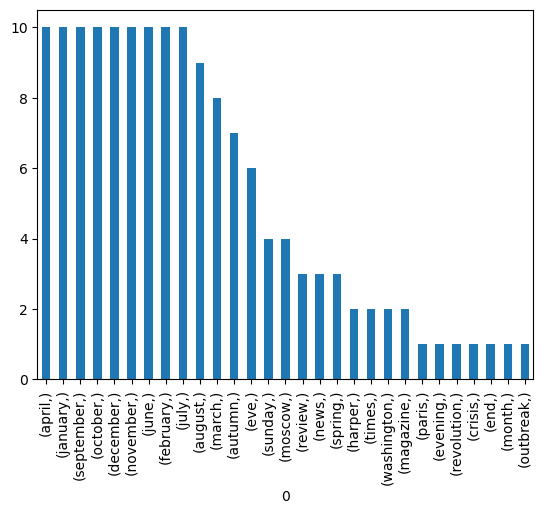

In [45]:
# october neighbour
h = pd.DataFrame(word_changes("october",dict_300, 3))
print(h.value_counts().plot.bar())
print(word_changes("october",dict_300, 1, 1))
dfstep23 = pd.DataFrame([work_df.loc['october'].iloc[:9],
            word_changes_tally_dict_2_sd.loc['october'],
            word_changes_tally_dict_300_sd.loc['october']]).transpose()
dfstep23.columns = ['cos-sim (october)', 'reduced-dim+knn (october)', 'full-dim+knn (october)']
print("\n")
print(dfstep23.abs().mean())

### symbol

AxesSubplot(0.125,0.11;0.775x0.77)
----------------------------------------------------------------------
1900 	 ['sign', 'glory', 'skills', 'image', 'reality', 'techniques', 'symbol', 'ml', 'mcgraw']
----------------------------------------------------------------------
1910 	 ['sign', 'shri', 'worship', 'skills', 'image', 'computer', 'techniques', 'symbol', 'ml']
{'same': 5, 'changes': 6}
----------------------------------------------------------------------
1920 	 ['sign', 'sacrifice', 'word', 'mark', 'unity', 'image', 'computer', 'god', 'symbol', 'concept']
{'same': 3, 'changes': 11}
----------------------------------------------------------------------
1930 	 ['sign', 'word', 'mark', 'shri', 'image', 'computer', 'god', 'name', 'mystery', 'symbol', 'unity']
{'same': 7, 'changes': 5}
----------------------------------------------------------------------
1940 	 ['sign', 'word', 'shri', 'unity', 'image', 'name', 'symbol', 'expression', 'concept']
{'same': 6, 'changes': 6}
------------

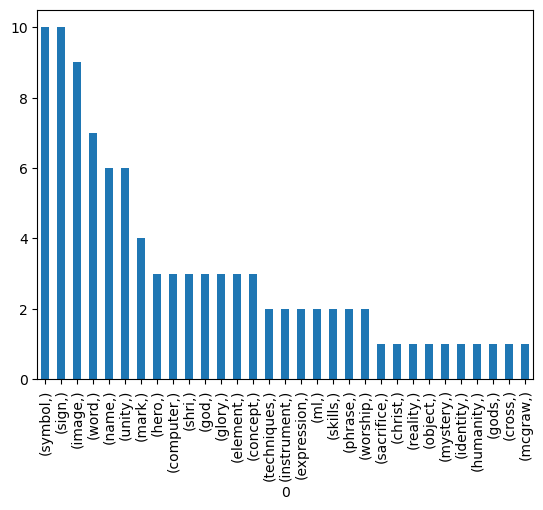

In [46]:
# symbol
h = pd.DataFrame(word_changes("symbol",dict_300, 3))
print(h.value_counts().plot.bar())

print(word_changes("symbol",dict_300, 1, 1))
dfstep23 = pd.DataFrame([work_df.loc['symbol'].iloc[:9],
            word_changes_tally_dict_2_sd.loc['symbol'],
            word_changes_tally_dict_300_sd.loc['symbol']]).transpose()
dfstep23.columns = ['cos-sim (symbol)', 'reduced-dim+knn (symbol)', 'full-dim+knn (symbol)']
print("\n")
print(dfstep23.abs().mean())

### instrument

AxesSubplot(0.125,0.11;0.775x0.77)
----------------------------------------------------------------------
1900 	 ['skills', 'instrument', 'techniques', 'apparatus', 'means', 'instruments', 'ml', 'document', 'mcgraw']
----------------------------------------------------------------------
1910 	 ['shri', 'skills', 'instrument', 'computer', 'techniques', 'apparatus', 'means', 'instruments', 'ml']
{'same': 6, 'changes': 4}
----------------------------------------------------------------------
1920 	 ['technique', 'instrument', 'computer', 'organ', 'apparatus', 'means', 'instruments', 'document', 'device']
{'same': 4, 'changes': 8}
----------------------------------------------------------------------
1930 	 ['shri', 'instrument', 'computer', 'organ', 'apparatus', 'instruments', 'document', 'device', 'measurement']
{'same': 6, 'changes': 4}
----------------------------------------------------------------------
1940 	 ['shri', 'technique', 'instrument', 'organ', 'apparatus', 'means', 'instru

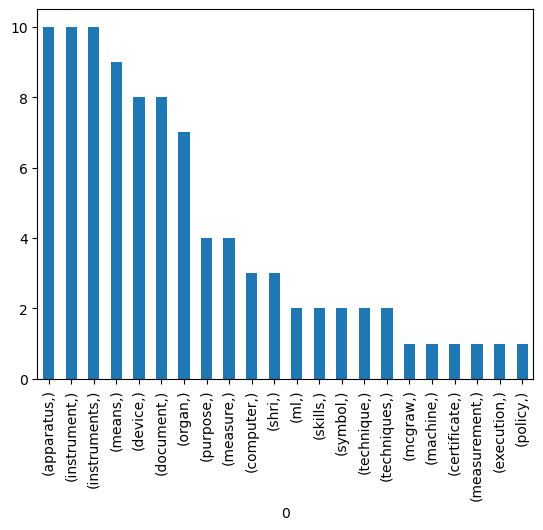

In [47]:
# instrument
h = pd.DataFrame(word_changes("instrument",dict_300, 3))
print(h.value_counts().plot.bar())

print(word_changes("instrument",dict_300, 1, 1))
dfstep23 = pd.DataFrame([work_df.loc['instrument'].iloc[:9],
            word_changes_tally_dict_2_sd.loc['instrument'],
            word_changes_tally_dict_300_sd.loc['instrument']]).transpose()
dfstep23.columns = ['cos-sim (instrument)', 'reduced-dim+knn (instrument)', 'full-dim+knn (instrument)']
print("\n")
print(dfstep23.abs().mean())

In [48]:
dfstep23 = pd.DataFrame([work_df.loc['october'].iloc[:9],
            word_changes_tally_dict_2_sd.loc['october'],
            word_changes_tally_dict_300_sd.loc['october']]).transpose()
dfstep23.columns = ['cos-sim (december)', 'reduced-dim+knn (december)', 'full-dim+knn (december)']
dfstep23

,cos-sim (december),reduced-dim+knn (december),full-dim+knn (december)
0,0.832312,-0.611775,-0.962250
1,0.830978,-0.611775,-0.384900
2,0.826939,-0.611775,-0.096225
3,0.836821,-0.611775,-0.673575
4,0.835404,-0.611775,-0.384900
5,0.829531,-0.611775,-0.962250
6,0.831152,2.141214,1.635826
7,0.835747,0.764719,1.635826
8,0.780744,0.764719,0.192450


In [49]:
# Step 2.4
# work_df2.loc['velocity']
# word_changes_tally_dict_2_sd.loc['december']


dfstep24 = pd.DataFrame([word_changes_tally_dict_300_sd.loc['instrument'],
            word_changes_tally_dict_300_sd.loc['mcgraw'],
            word_changes_tally_dict_300_sd.loc['techniques']]).transpose()
dfstep24.index = ([str(a) for a in range(1910,2000,10)])

print(dfstep24)
print(print(word_changes("instrument",dict_300, 1, 0)))
print(print(word_changes("mcgraw",dict_300, 1, 0)))
print(print(word_changes("techniques",dict_300, 1, 0)))



      instrument    mcgraw  techniques
1910   -0.333333  2.666649   -0.293189
1920    2.666667 -0.326225    2.666348
1930   -0.333333 -0.333907   -0.338576
1940   -0.333333 -0.335444   -0.338576
1950   -0.333333 -0.333907   -0.333880
1960   -0.333333 -0.338516   -0.335445
1970   -0.333333 -0.333907   -0.341706
1980   -0.333333 -0.335444   -0.343271
1990   -0.333333 -0.329298   -0.341706
[4, 8, 4, 4, 4, 4, 4, 4, 4]
None
[1957, 9, 4, 3, 4, 1, 4, 3, 7]
None
[38, 1929, 9, 9, 12, 11, 7, 6, 7]
None
